In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('cleaned amazon data.csv')

In [3]:
df1.head()

,category,title,author,publication_date,rating,number_of_ratings
0,Arts & Photography,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,2015-01-01,4.8,27397
1,Arts & Photography,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondo,2014-10-14,4.5,23167
2,Arts & Photography,Born a Crime: Stories from a South African Chi...,Trevor Noah,2016-11-15,4.8,20444
3,Arts & Photography,Proof of Heaven: A Neurosurgeon's Journey into...,Eben Alexander,2012-10-23,4.3,13695
4,Arts & Photography,Calm the F*ck Down: An Irreverent Adult Colori...,Sasha O'Hara,2016-01-06,4.6,11160


In [5]:
df1.shape

(1534, 6)

In [6]:
df1.describe()

,rating,number_of_ratings
count,1534.000000,1534.000000
mean,4.654533,11070.521512
std,0.144072,9652.938201
min,4.300000,821.000000
25%,4.600000,4602.500000
50%,4.700000,8723.000000
75%,4.800000,14107.000000
max,4.900000,96513.000000


In [7]:
df1.dtypes

category              object
title                 object
author                object
publication_date      object
rating               float64
number_of_ratings      int64
dtype: object

In [9]:
from datetime import datetime
df1['publication_date']= df1['publication_date'].astype('datetime64[ns]')

In [10]:
df1.dtypes

category                     object
title                        object
author                       object
publication_date     datetime64[ns]
rating                      float64
number_of_ratings             int64
dtype: object

In [11]:
df1.head()

,category,title,author,publication_date,rating,number_of_ratings
0,Arts & Photography,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,2015-01-01,4.8,27397
1,Arts & Photography,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondo,2014-10-14,4.5,23167
2,Arts & Photography,Born a Crime: Stories from a South African Chi...,Trevor Noah,2016-11-15,4.8,20444
3,Arts & Photography,Proof of Heaven: A Neurosurgeon's Journey into...,Eben Alexander,2012-10-23,4.3,13695
4,Arts & Photography,Calm the F*ck Down: An Irreverent Adult Colori...,Sasha O'Hara,2016-01-06,4.6,11160


In [16]:
df = df1.loc[df1['publication_date'] <='2020']


In [17]:
df.shape

(1441, 6)

In [13]:
df1['rating'].max()

4.9

In [18]:
# Highest rated books
df[df['rating']==4.9]

,category,title,author,publication_date,rating,number_of_ratings
10,Arts & Photography,Strange Planet,Nathan W. Pyle,2019-11-19,4.9,9879
51,Calendars,Thomas Kinkade Studios: Disney Dreams Collecti...,Thomas Kinkade,2019-05-28,4.9,2951
74,Children's Books,The Very Hungry Caterpillar,Eric Carle,1994-03-23,4.9,21323
75,Children's Books,The Very Hungry Caterpillar Giant Board Book a...,Eric Carle,2001-10-01,4.9,21323
76,Children's Books,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,2016-10-04,4.9,20763
...,...,...,...,...,...,...
1357,Parenting & Relationships,How to Babysit a Grandad,Jean Reagan,2013-09-05,4.9,4203
1386,Reference,Corduroy,Don Freeman,1976-09-30,4.9,4956
1403,Religion & Spirituality,When God Made You,Matthew Paul Turner,2017-02-28,4.9,7674
1446,Science Fiction & Fantasy,Strange Planet,J.R.R. Tolkien,2019-11-19,4.9,9881


In [24]:
#most reviewed books
df.sort_values('number_of_ratings', ascending = False).iloc[:5].title.unique()

array(['Where the Crawdads Sing', 'The Girl on the Train', 'Becoming'],
      dtype=object)

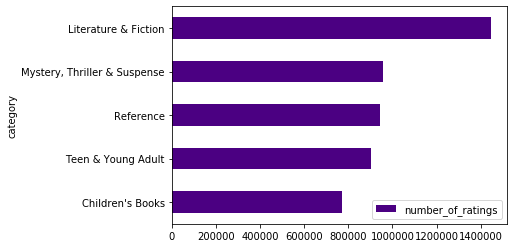

In [44]:
#categories with most reviews
most_review = df.groupby('category')['number_of_ratings'].sum().to_frame().reset_index().sort_values('number_of_ratings', ascending = False).iloc[:5]
most_review.sort_values('number_of_ratings').plot.barh(x = 'category', color = 'indigo')

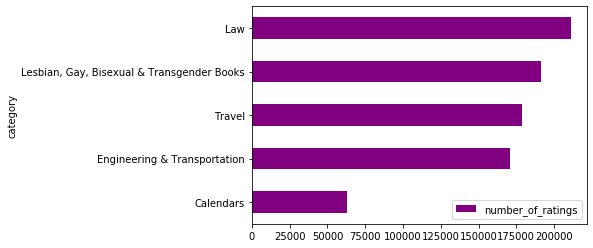

In [47]:
#categories with least reviews
least_review = df.groupby('category')['number_of_ratings'].sum().to_frame().reset_index().sort_values('number_of_ratings').iloc[:5]
least_review.sort_values('number_of_ratings').plot.barh(x = 'category', color = 'purple')

In [55]:
df.groupby('category')['rating'].mean().to_frame().reset_index().sort_values('rating', ascending = False).reset_index(drop = True)

,category,rating
0,Children's Books,4.785974
1,Calendars,4.736370
2,Humor & Entertainment,4.710319
3,Education & Teaching,4.695745
4,Religion & Spirituality,4.693182
5,Christian Books & Bibles,4.684444
6,Parenting & Relationships,4.683800
7,Computers & Technology,4.678927
8,Biographies & Memoirs,4.671700
9,Reference,4.668949
